# IMPORTING LIBRARIES

In [1]:
import re
import numpy as np
import collections
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pickle

from sklearn.preprocessing import LabelEncoder
from collections import Counter
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA


# LOAD DATASET

In [2]:
df = pd.read_csv("mbti_1.csv")


# DATA - PREPROCESSING

In [3]:
df.head()

,type,posts
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...
1,ENTP,'I'm finding the lack of me in these posts ver...
2,INTP,'Good one _____ https://www.youtube.com/wat...
3,INTJ,"'Dear INTP, I enjoyed our conversation the o..."
4,ENTJ,'You're fired.|||That's another silly misconce...


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8675 entries, 0 to 8674
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   type    8675 non-null   object
 1   posts   8675 non-null   object
dtypes: object(2)
memory usage: 135.7+ KB


In [5]:
df.shape

(8675, 2)

In [6]:
df.describe()

,type,posts
count,8675,8675
unique,16,8675
top,INFP,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...
freq,1832,1


In [7]:
df['type'].value_counts()

type
INFP    1832
INFJ    1470
INTP    1304
INTJ    1091
ENTP     685
ENFP     675
ISTP     337
ISFP     271
ENTJ     231
ISTJ     205
ENFJ     190
ISFJ     166
ESTP      89
ESFP      48
ESFJ      42
ESTJ      39
Name: count, dtype: int64

# EXTRACTING FEATURES 

In [8]:
df['words_per_comment'] = df['posts'].apply(lambda x: len(x.split())/50)
df['http_per_comment'] = df['posts'].apply(lambda x: x.count('http')/50)
df['music_per_comment'] = df['posts'].apply(lambda x: x.count('music')/50)
df['question_per_comment'] = df['posts'].apply(lambda x: x.count('?')/50)
df['img_per_comment'] = df['posts'].apply(lambda x: x.count('jpg')/50)
df['excl_per_comment'] = df['posts'].apply(lambda x: x.count('!')/50)
df['ellipsis_per_comment'] = df['posts'].apply(lambda x: x.count('...')/50)

df.head()

,type,posts,words_per_comment,http_per_comment,music_per_comment,question_per_comment,img_per_comment,excl_per_comment,ellipsis_per_comment
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...,11.12,0.48,0.02,0.36,0.12,0.06,0.30
1,ENTP,'I'm finding the lack of me in these posts ver...,23.40,0.20,0.00,0.10,0.02,0.00,0.38
2,INTP,'Good one _____ https://www.youtube.com/wat...,16.72,0.10,0.00,0.24,0.00,0.08,0.26
3,INTJ,"'Dear INTP, I enjoyed our conversation the o...",21.28,0.04,0.02,0.22,0.00,0.06,0.52
4,ENTJ,'You're fired.|||That's another silly misconce...,19.34,0.12,0.02,0.20,0.04,0.02,0.42


In [9]:
df.dtypes

type                     object
posts                    object
words_per_comment       float64
http_per_comment        float64
music_per_comment       float64
question_per_comment    float64
img_per_comment         float64
excl_per_comment        float64
ellipsis_per_comment    float64
dtype: object

In [10]:
df.columns

Index(['type', 'posts', 'words_per_comment', 'http_per_comment',
       'music_per_comment', 'question_per_comment', 'img_per_comment',
       'excl_per_comment', 'ellipsis_per_comment'],
      dtype='object')

# PERSONALITY TYPE 


<span style="color: orange;font-size: 20px;">Personality type across 4 axis:
</span>

Introversion (I) – Extroversion (E)

Intuition (N) – Sensing (S)

Thinking (T) – Feeling (F)

Judging (J) – Perceiving (P)


In [11]:
map1 = {"I": 0, "E": 1}
map2 = {"N": 0, "S": 1}
map3 = {"T": 0, "F": 1}
map4 = {"J": 0, "P": 1}
df['I-E'] = df['type'].astype(str).str[0]
df['I-E'] = df['I-E'].map(map1)
df['N-S'] = df['type'].astype(str).str[1]
df['N-S'] = df['N-S'].map(map2)
df['T-F'] = df['type'].astype(str).str[2]
df['T-F'] = df['T-F'].map(map3)
df['J-P'] = df['type'].astype(str).str[3]
df['J-P'] = df['J-P'].map(map4)
df.head()

,type,posts,words_per_comment,http_per_comment,music_per_comment,question_per_comment,img_per_comment,excl_per_comment,ellipsis_per_comment,I-E,N-S,T-F,J-P
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...,11.12,0.48,0.02,0.36,0.12,0.06,0.30,0,0,1,0
1,ENTP,'I'm finding the lack of me in these posts ver...,23.40,0.20,0.00,0.10,0.02,0.00,0.38,1,0,0,1
2,INTP,'Good one _____ https://www.youtube.com/wat...,16.72,0.10,0.00,0.24,0.00,0.08,0.26,0,0,0,1
3,INTJ,"'Dear INTP, I enjoyed our conversation the o...",21.28,0.04,0.02,0.22,0.00,0.06,0.52,0,0,0,0
4,ENTJ,'You're fired.|||That's another silly misconce...,19.34,0.12,0.02,0.20,0.04,0.02,0.42,1,0,0,0


# VISUALIZATION

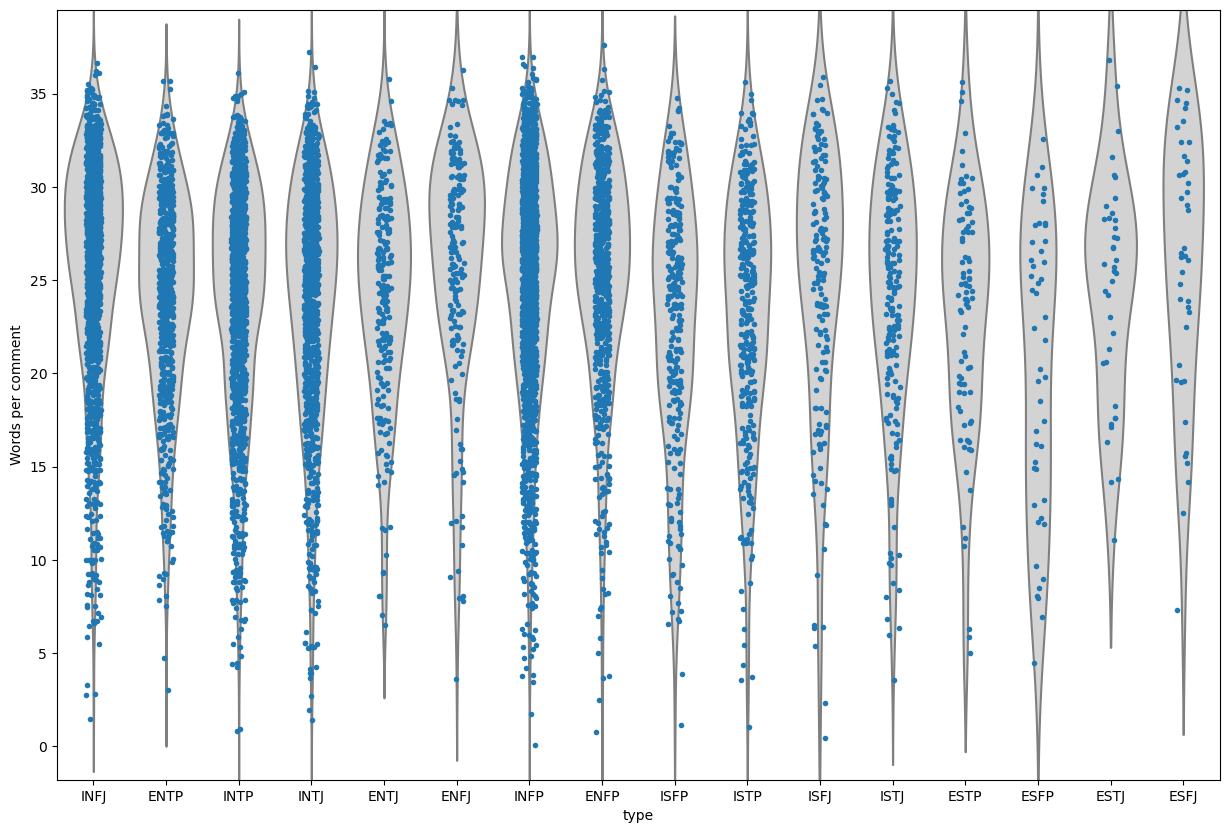

In [12]:
plt.figure(figsize=(15,10))
sns.violinplot(x='type', y='words_per_comment', data=df, inner=None, color='lightgray')
sns.stripplot(x='type', y='words_per_comment', data=df, size=4, jitter=True)
plt.ylabel('Words per comment')
plt.show()

<Figure size 1500x1000 with 0 Axes>

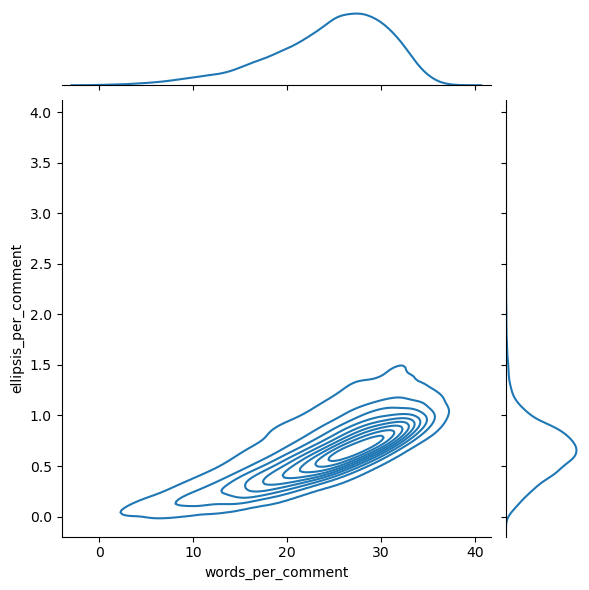

In [13]:
plt.figure(figsize=(15,10))
sns.jointplot(x='words_per_comment', y='ellipsis_per_comment', data=df, kind='kde')


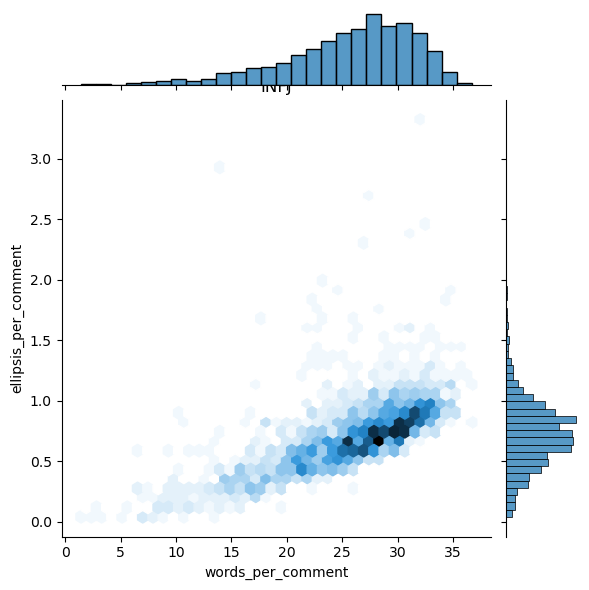

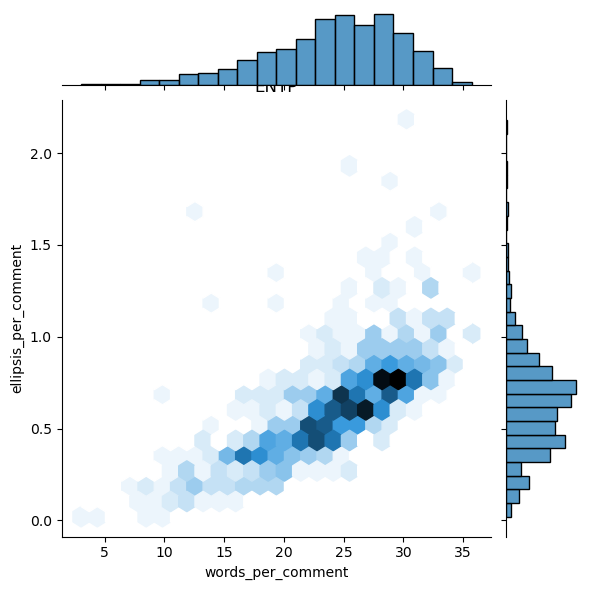

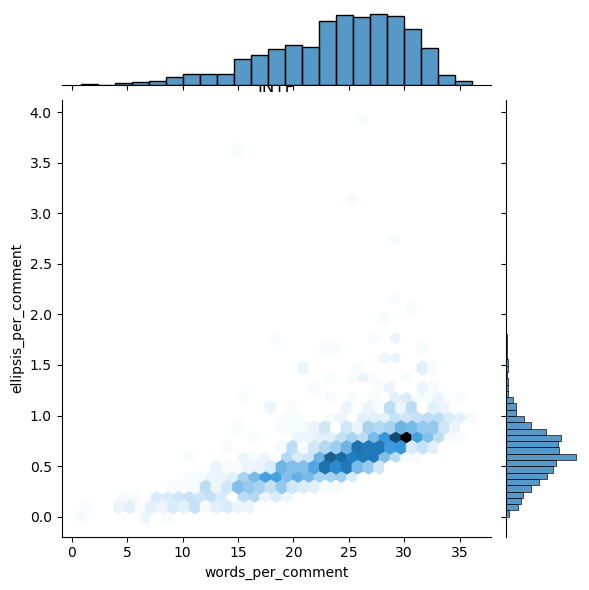

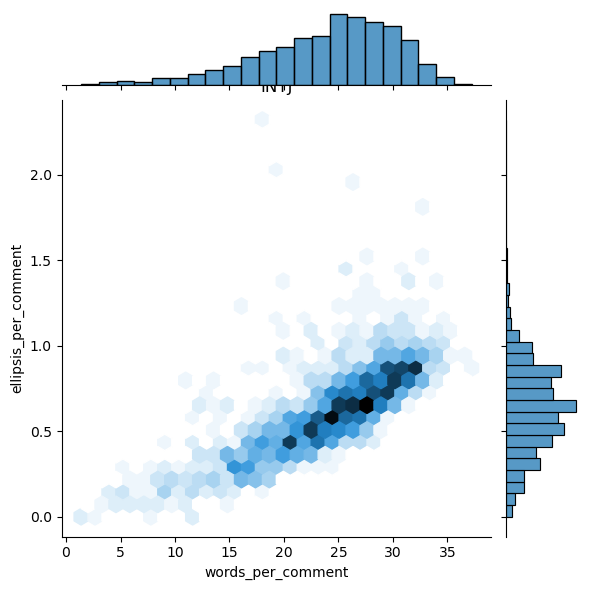

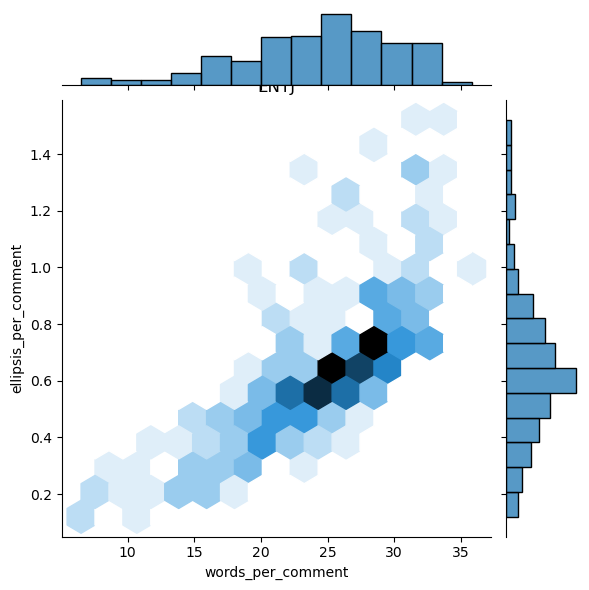

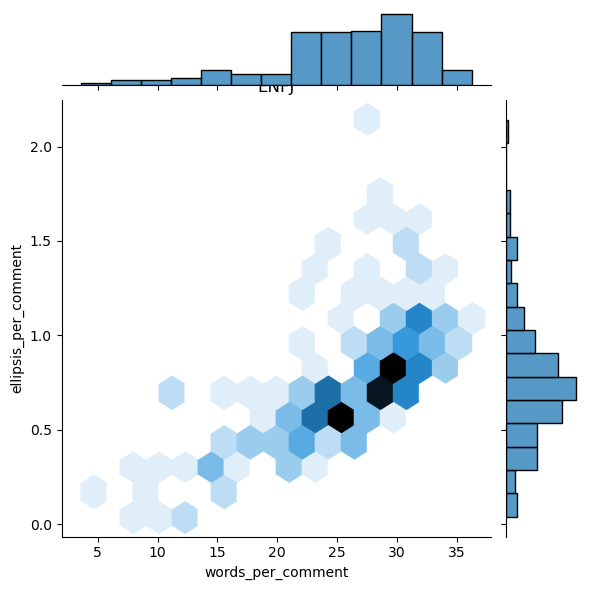

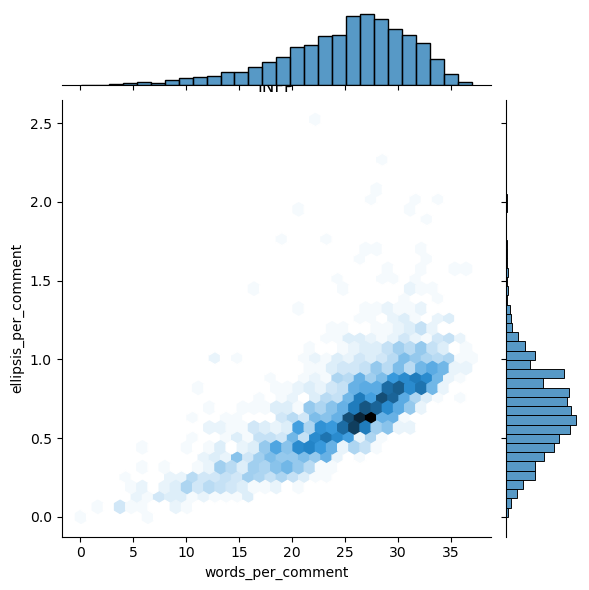

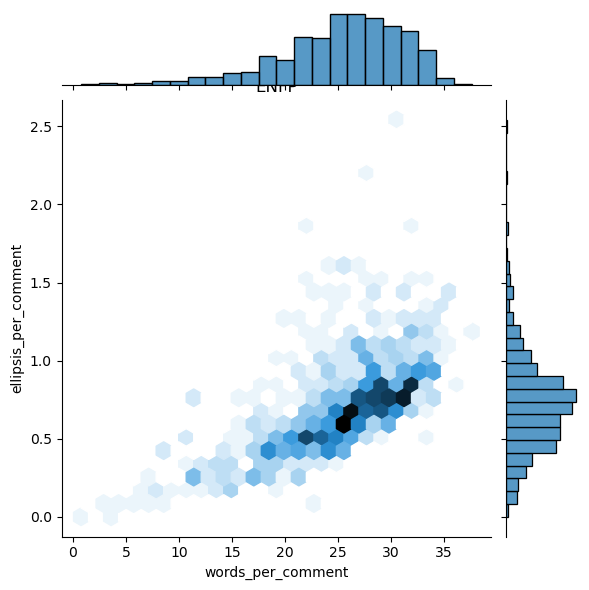

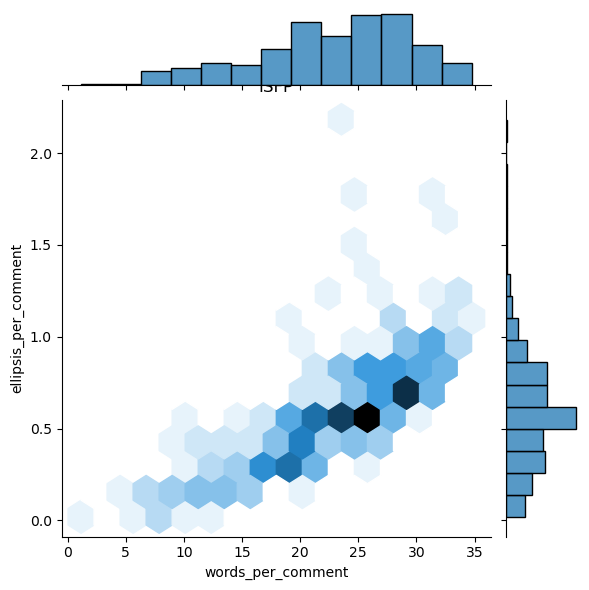

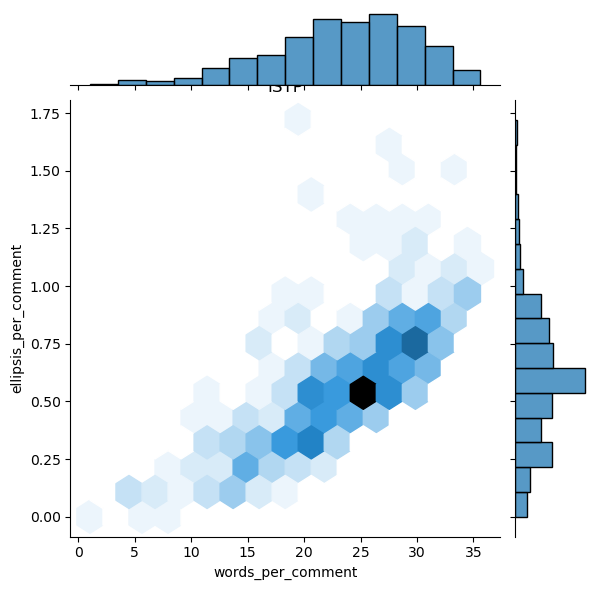

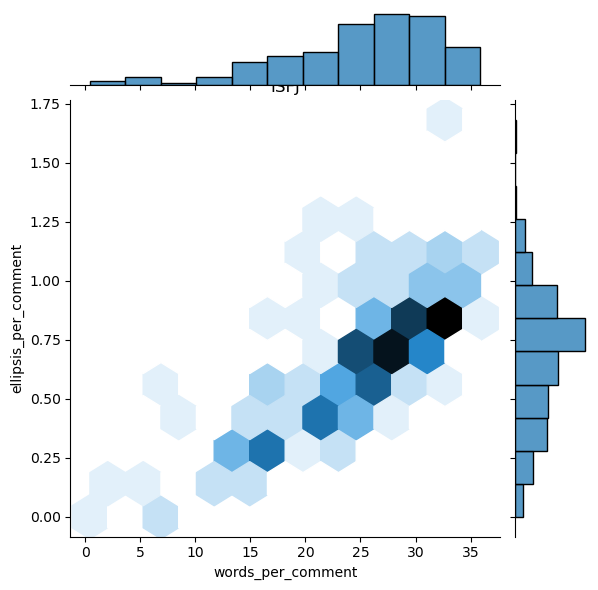

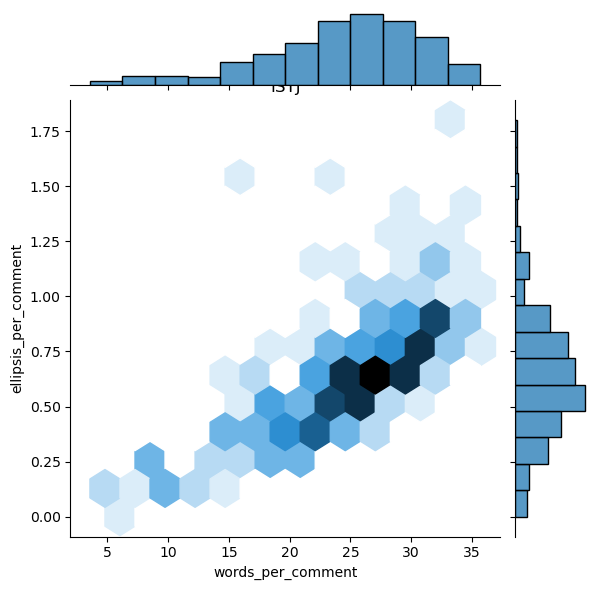

In [14]:
i = df['type'].unique()
k = 0
for m in range(0,2):
    for n in range(0,6):
        df_2 = df[df['type'] == i[k]]
        sns.jointplot(x='words_per_comment', y='ellipsis_per_comment', data=df_2, kind="hex")
        plt.title(i[k])
        k+=1

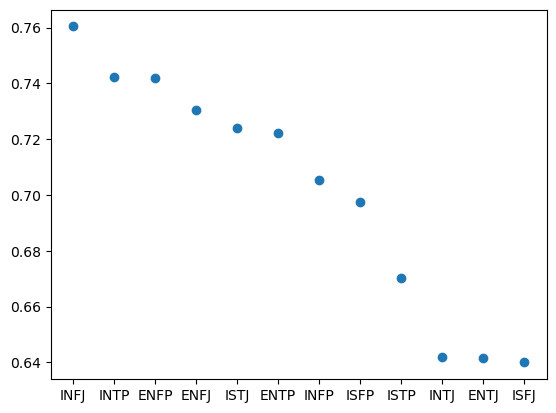

In [15]:
i = df['type'].unique()
k = 0
TypeArray = []
PearArray=[]
for m in range(0,2):
    for n in range(0,6):
        df_2 = df[df['type'] == i[k]]
        pearsoncoef1=np.corrcoef(x=df_2['words_per_comment'], y=df_2['ellipsis_per_comment'])
        pear=pearsoncoef1[1][0]
        TypeArray.append(i[k])
        PearArray.append(pear)
        k+=1


TypeArray = [x for _,x in sorted(zip(PearArray,TypeArray))]
PearArray = sorted(PearArray, reverse=True)
plt.scatter(TypeArray, PearArray)

In [16]:
print(i)

['INFJ' 'ENTP' 'INTP' 'INTJ' 'ENTJ' 'ENFJ' 'INFP' 'ENFP' 'ISFP' 'ISTP'
 'ISFJ' 'ISTJ' 'ESTP' 'ESFP' 'ESTJ' 'ESFJ']


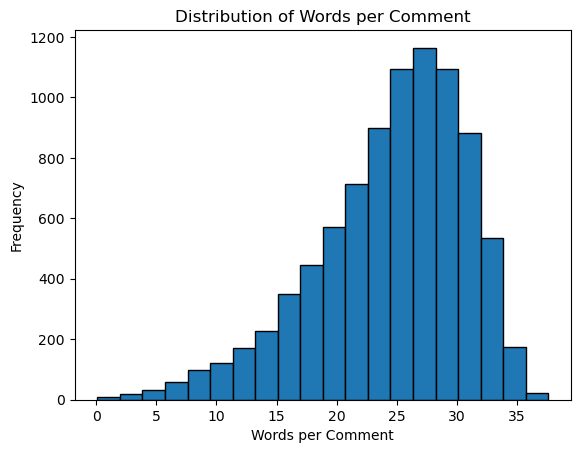

In [17]:
words_per_comment_values = df['words_per_comment']

# Plot a histogram
plt.hist(words_per_comment_values, bins=20, edgecolor='black')
plt.title('Distribution of Words per Comment')
plt.xlabel('Words per Comment')
plt.ylabel('Frequency')
plt.show()

# SPLITING DATASET 

In [18]:
X = df.drop(['type','posts','I-E','N-S','T-F','J-P'], axis=1).values
y = df['type'].values

In [19]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size = 0.1, random_state=5)

# MODEL IMPLEMENTATION

In [20]:
# Principle Component Analysis (PCA)
pca = PCA(n_components=2)
principal_components = pca.fit_transform(X)

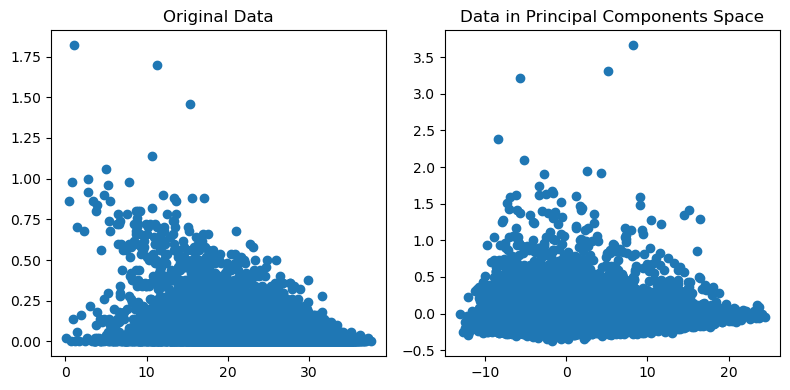

In [21]:
plt.figure(figsize=(8, 4))

plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1])
plt.title('Original Data')

plt.subplot(1, 2, 2)
plt.scatter(principal_components[:, 0], principal_components[:, 1])
plt.title('Data in Principal Components Space')

plt.tight_layout()
plt.show()


In [22]:
#Stochastic Gradient Descent (SGD)
sgd = SGDClassifier(max_iter=5, tol=None)
sgd.fit(X_train, y_train)
Y_pred = sgd.predict(X_test)
sgd.score(X_train, y_train)
acc_sgd = round(sgd.score(X_train, y_train) * 100, 2)
print(round(acc_sgd,2,), "%")

7.93 %


In [23]:
# Random Forest Classifier
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)

Y_prediction = random_forest.predict(X_test)

random_forest.score(X_train, y_train)
acc_random_forest = round(random_forest.score(X_train, y_train) * 100, 2)
print(round(acc_random_forest,2,), "%")

100.0 %


In [24]:
# Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

Y_pred = logreg.predict(X_test)

acc_log = round(logreg.score(X_train, y_train) * 100, 2)
print(round(acc_log,2,), "%")

23.25 %


C:\Users\jbaby\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [25]:
# K-Nearest Neighbor (KNN)
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)

Y_pred = knn.predict(X_test)

acc_knn = round(knn.score(X_train, y_train) * 100, 2)
print(round(acc_knn,2,), "%")

46.62 %


In [26]:
# Support Vector Classifier (SVC)
svm_classifier = SVC(kernel='rbf', C=1.0, gamma='scale')
svm_classifier.fit(X_train, y_train)
y_pred = svm_classifier.predict(X_test)

acc_svm = round(svm_classifier.score(X_train, y_train) * 100, 2)
print(round(acc_svm,2,), "%")


21.11 %


# COLLECT USER INPUT

In [34]:
columns = ['words_per_comment', 'http_per_comment', 'music_per_comment', 
           'question_per_comment', 'img_per_comment', 'excl_per_comment', 
           'ellipsis_per_comment']

input_values = {}
for column in columns:
    value = input(f"Enter value for {column}: ")
    input_values[column] = float(value)  # Assuming the values are numeric, adjust data type if needed
input_values


Enter value for words_per_comment: 2
Enter value for http_per_comment: 3
Enter value for music_per_comment: 3
Enter value for question_per_comment: 3
Enter value for img_per_comment: 3
Enter value for excl_per_comment: 33
Enter value for ellipsis_per_comment: 3


{'words_per_comment': 2.0,
 'http_per_comment': 3.0,
 'music_per_comment': 3.0,
 'question_per_comment': 3.0,
 'img_per_comment': 3.0,
 'excl_per_comment': 33.0,
 'ellipsis_per_comment': 3.0}

# MODEL PREDICTION

In [35]:
prediction = random_forest.predict([list(input_values.values())])
print("Predicted Output:", prediction[0])


Predicted Output: ENFP


In [36]:

with open('trained_model.pkl', 'wb') as file:
    pickle.dump(prediction, file)

In [41]:
concatenated_data.to_csv('Personality_data.csv', index=False)


In [39]:
X_df = pd.DataFrame(X)
y_df = pd.DataFrame(y)

# Concatenate X and y along the columns
concatenated_data = pd.concat([X_df, y_df], axis=1)